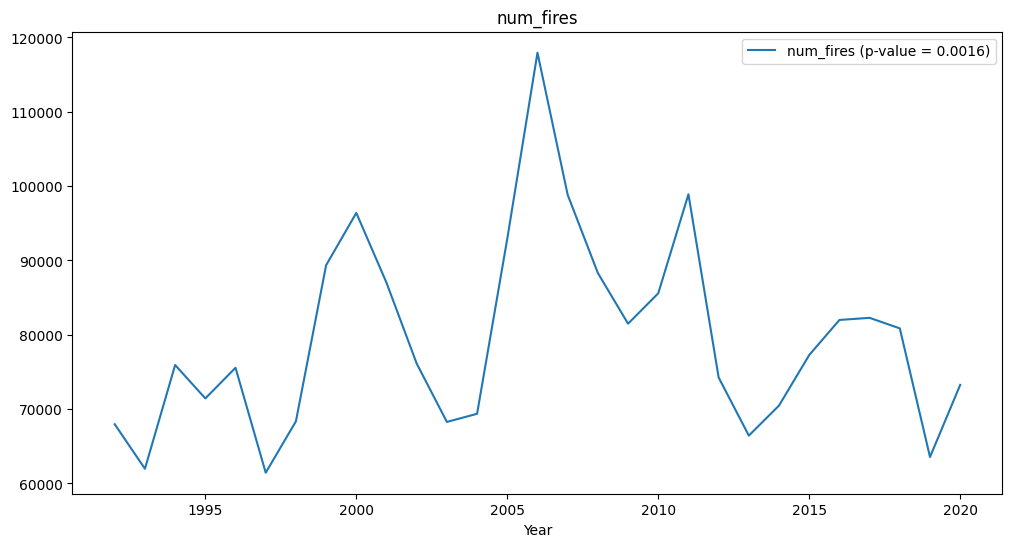

num_fires: Stationary (p-value = 0.0016)


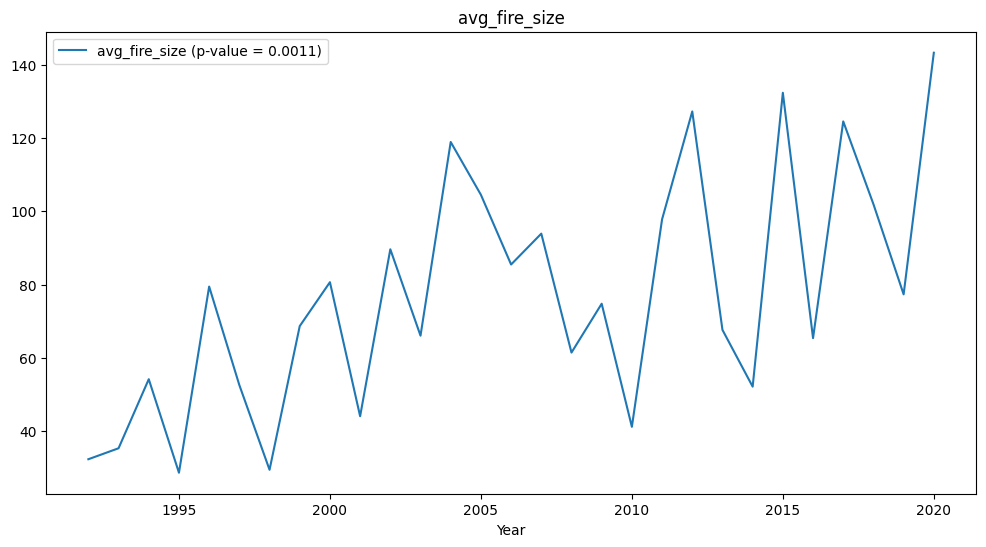

avg_fire_size: Stationary (p-value = 0.0011)


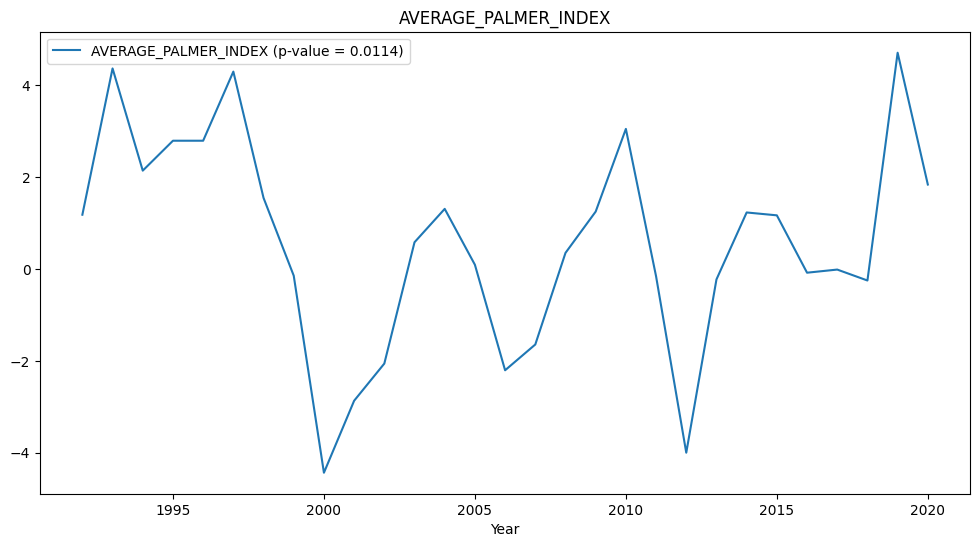

AVERAGE_PALMER_INDEX: Stationary (p-value = 0.0114)


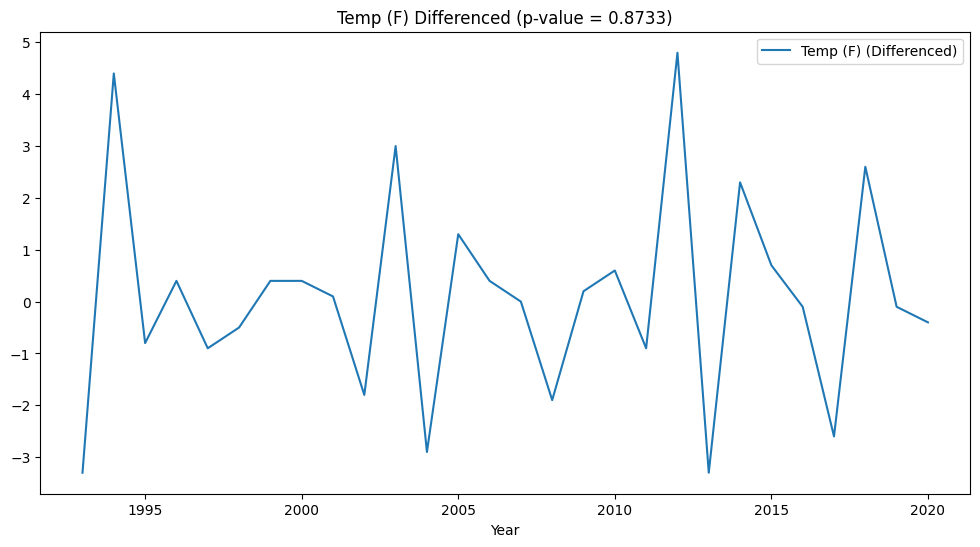

Temp (F): Not Stationary (p-value = 0.8733)


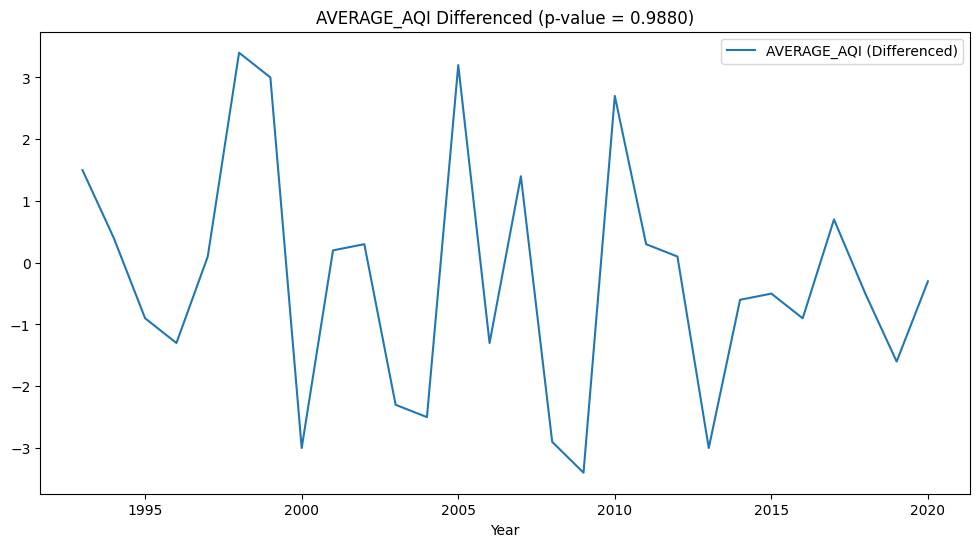

AVERAGE_AQI: Not Stationary (p-value = 0.9880)


In [5]:
import sqlite3
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('.database')

# Query data from the 'Data' table
query = "SELECT * FROM Data"
data = pd.read_sql_query(query, conn)

# Define a Stationarity Check Function
def check_stationarity(series):
    result = sm.tsa.adfuller(series)
    p_value = result[1]  # Get the p-value
    return p_value <= 0.05, p_value

# Loop Through Variables and Check Stationarity
for column in data.columns[1:]:  # Exclude the 'Year' column
    series = data[column]
    is_stationary, p_value = check_stationarity(series)

    if not is_stationary:
        # If not stationary, difference the series
        differenced_series = series.diff().dropna()

        # Plot the differenced series
        plt.figure(figsize=(12, 6))
        plt.plot(data['year'][1:], differenced_series, label=f'{column} (Differenced)')
        plt.title(f'{column} Differenced (p-value = {p_value:.4f})')
        plt.xlabel('Year')
        plt.legend()
        plt.show()
    else:
        # Plot the stationary series
        plt.figure(figsize=(12, 6))
        plt.plot(data['year'], series, label=f'{column} (p-value = {p_value:.4f})')
        plt.title(f'{column}')
        plt.xlabel('Year')
        plt.legend()
        plt.show()

    # Print whether the series is stationary and its p-value
    stationarity_status = "Stationary" if is_stationary else "Not Stationary"
    print(f'{column}: {stationarity_status} (p-value = {p_value:.4f})')

# Close the database connection
conn.close()



## Time Series Analysis with SQLite Database

In this code, I'm working with time series data stored in my SQLite database. The goal is to analyze the data, check for stationarity in each column, and visualize the results. Here's a breakdown of what the code is doing:

### Querying the Data
I run a SQL query to retrieve the time series data from the 'Data' table in my database. This data contains columns such as 'Year' and other variables that I want to analyze.

### Stationarity Check
For each column in the dataset (excluding the 'Year' column), I perform a stationarity check. **Stationarity** is an important concept in time series analysis because it affects the performance of forecasting models. A stationary time series is one whose statistical properties, such as mean and variance, do not change over time. To determine stationarity, I use the **Augmented Dickey-Fuller (ADF) test**.

#### How the ADF Test Works
The ADF test assesses whether a time series is stationary or not by examining the presence of a unit root in the data. A unit root suggests that the data is non-stationary, while the absence of a unit root indicates stationarity. The test computes a **p-value**, and if this p-value is less than or equal to 0.05 (a commonly chosen significance level), we reject the null hypothesis that the series has a unit root, concluding that the series is stationary.

### Plotting the Data
Depending on whether a series is stationary or not, I create different visualizations:

- If a series is stationary, I plot it directly over time, helping me understand its behavior.
- If a series is not stationary, I take the first difference (i.e., subtract each value from the previous one) to make it stationary, and then plot the differenced series.

### Displaying the Results
The code generates plots for each variable, making it easy for me to visualize and interpret the data. The title of each plot indicates whether it's the original series or the differenced one.


This code streamlines the process of checking and visualizing the stationarity of time series data, a crucial step when working with such data for forecasting or analysis. The Augmented Dickey-Fuller test plays a key role in determining whether these time series are stationary or require differencing to become suitable for analysis.